<a href="https://colab.research.google.com/github/karsakami/Machine-Learning-Case-Studies/blob/main/K_NN_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **KNN** 

The algorithm assumes that similar things exist in close proximity. For the example - there is high probability that you have same interest as your friends, there is high probability that you are vegetarian if your whole family is vege, that is high proabability that you speak french if your classmates are french


The implementation of the algorithm goes by:

1. Loading and cleaning the data
2. Initializing the k to your chosen number of neighbors

---




# Predicting Breast Cancer

Data is from UCI repo. We will be training K-Neighbor (KNN) algorithm to predict whether a cell is benign or malignant

### Cleaning & Analysis

In [26]:
import pyforest

In [27]:
df = pd.read_csv("wisc_bc_data.csv")

<IPython.core.display.Javascript object>

Diagnosis is our target here ($y$), rest is independent values ($x$).

**B** - not cancerious

**M** - cancerious


Look at the data

In [28]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Creating a variable $y$ with target data

In [29]:
y = df['diagnosis']
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [30]:
df.shape

(569, 32)

### Check nulls

In [31]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Convert to category with astype function

In [33]:
df['diagnosis']=df['diagnosis'].astype('category')

In [34]:
df.dtypes

id                            int64
diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           

### Check for balance in data

In [35]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

We dont use this "id" column, drop them with **drop** column

In [36]:
df = df.drop(labels='id', axis=1)

Creating $x$ variables. Its everything, except of diagnosis, because its $y$

In [37]:
x = df.drop(labels='diagnosis', axis=1)

So actually the values have big distance from each other, **they are not in the same scale** we need to punish these big values with z score.

Apply the on the x data. We create the variable called xscaled, because its effect of using the zscore on data

ZSCORE is just mean - original data point / standard deviation

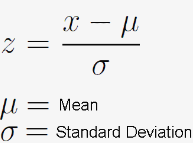

In [38]:
from scipy.stats import zscore

xscaled = x.apply(zscore)

Lets now look at standard deviation, its now same everywhere.

In [39]:
xscaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


We will use this data to fit the model

In [40]:
xscaled_df = pd.DataFrame(xscaled)

<IPython.core.display.Javascript object>

### **Splitting data** to train and split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(xscaled_df,y,test_size=0.2,random_state=1)

In [43]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
408,1.097064,0.318890,1.063983,0.957925,0.515218,0.493857,0.392979,1.014241,0.658562,-0.298776,...,0.996235,-0.043516,0.918559,0.823436,0.693984,0.758501,0.277832,1.260668,0.257622,0.060081
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
307,-1.456224,-1.137854,-1.466743,-1.162069,-1.872383,-1.386888,-1.068658,-1.172263,-0.086230,0.784274,...,-1.360572,-0.913101,-1.380908,-1.046104,-1.479838,-1.284653,-1.235211,-1.533565,0.145995,-0.327276
386,-0.544538,-1.209993,-0.543259,-0.548596,-1.087428,-0.494842,-0.256238,-0.608200,-0.604664,-0.178279,...,-0.650071,-1.040120,-0.584136,-0.616470,-1.304933,-0.071025,0.169888,-0.353352,-0.361988,0.237966
404,-0.507616,-1.009865,-0.563442,-0.528403,-0.678938,-1.111144,-0.850089,-0.732011,-0.878485,-0.810531,...,-0.639717,-1.437458,-0.689578,-0.610845,-1.208494,-1.188468,-1.069745,-1.015252,-0.975127,-1.341385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1.608290,1.356762,1.582979,1.527599,0.365770,1.033974,2.080367,1.701909,1.425260,-0.236401,...,1.317213,1.286918,1.234289,1.245335,-0.213419,0.838655,1.415804,0.892184,0.653979,0.039023
144,-0.959199,-1.005211,-0.976580,-0.852062,-1.311599,-1.003499,-0.832260,-1.058692,-1.506447,-0.838883,...,-0.894429,-0.807253,-0.877825,-0.772397,-1.085753,-0.839482,-0.837832,-1.225379,-0.971891,-0.900829
72,0.872693,1.217138,0.915698,0.780737,0.764297,1.490705,1.009428,0.787254,0.421251,0.293783,...,1.460100,1.326001,1.320668,1.407063,1.145493,3.086136,1.844223,1.146468,0.666921,2.768252
235,-0.027632,0.456187,-0.089755,-0.146440,-0.402816,-0.661236,-0.931319,-0.772766,-1.075636,-0.630495,...,-0.194490,0.749534,-0.267811,-0.290202,-0.160816,-0.655002,-1.006897,-0.532569,-1.091607,-0.430903


### **Learning**

Finally import the KNN algorithm, and we actually are predicting two classes. 

If we are dealing with regression problems we can use **KNeighborsRegressor** algorithm.

We actually we can use Kneighbors for **classification** and **regression** problems

So its similar to linear regression algorithm, Naive Bayes:

1. Import the algorithm

2. Create the variable, instance of algorithm

3. **Fit** instanced algorithm on training data

4. **Predict** on test data

5. Check **score** - accuracy

1. Import the algorithm

In [44]:
from sklearn.neighbors import KNeighborsClassifier

2. Create the variable, instance of algorithm

In [45]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')

3. Fit instanced algorithm on training data

In [46]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

4. Predict on test data

In [47]:
prediction = KNN.predict(x_test)
prediction

array(['B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B'], dtype=object)

5. Check accuracy

In [48]:
KNN.score(x_test, y_test)

0.956140350877193

# Confusion matrix

In [49]:
cm = metrics.confusion_matrix(y_test, prediction, labels=['M','B'])
cm

<IPython.core.display.Javascript object>

array([[37,  5],
       [ 0, 72]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

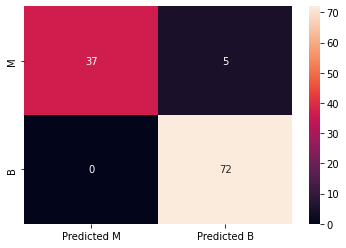

In [50]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, prediction, labels=['M','B'])

df_cm = pd.DataFrame(cm, index=[i for i in ['M','B']], columns=[i for i in ['Predicted M', 'Predicted B']])

sns.heatmap(df_cm, annot=True)

plt.show()